## Setup Envionment

In [1]:
import pandas as pd
#import numpy as np
import matplotlib.pyplot as plt
import datetime
#import seaborn as sns
import yfinance as yf
%matplotlib inline
#import pandas_datareader.data as web

## Collection of Data

In [2]:
data=yf.Ticker("GOOG")

In [3]:
df=data.history(start="2020-1-1",end="2023-11-27")

In [4]:
df6=data.history(start="2020-1-1",end="2020-1-10")

In [5]:
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2020-01-02 00:00:00-05:00,67.077499,68.406998,67.077499,68.368500,28132000,0.0,0.0
2020-01-03 00:00:00-05:00,67.392998,68.625000,67.277199,68.032997,23728000,0.0,0.0
2020-01-06 00:00:00-05:00,67.500000,69.824997,67.500000,69.710503,34646000,0.0,0.0
2020-01-07 00:00:00-05:00,69.897003,70.149498,69.518997,69.667000,30054000,0.0,0.0
2020-01-08 00:00:00-05:00,69.603996,70.579002,69.542000,70.216003,30560000,0.0,0.0
...,...,...,...,...,...,...,...
2023-11-17 00:00:00-05:00,137.820007,138.000000,135.479996,136.940002,25565300,0.0,0.0
2023-11-20 00:00:00-05:00,135.500000,138.425003,135.490005,137.919998,19569400,0.0,0.0
2023-11-21 00:00:00-05:00,137.940002,138.964996,137.705002,138.619995,17648100,0.0,0.0


## Stock Price Visualization

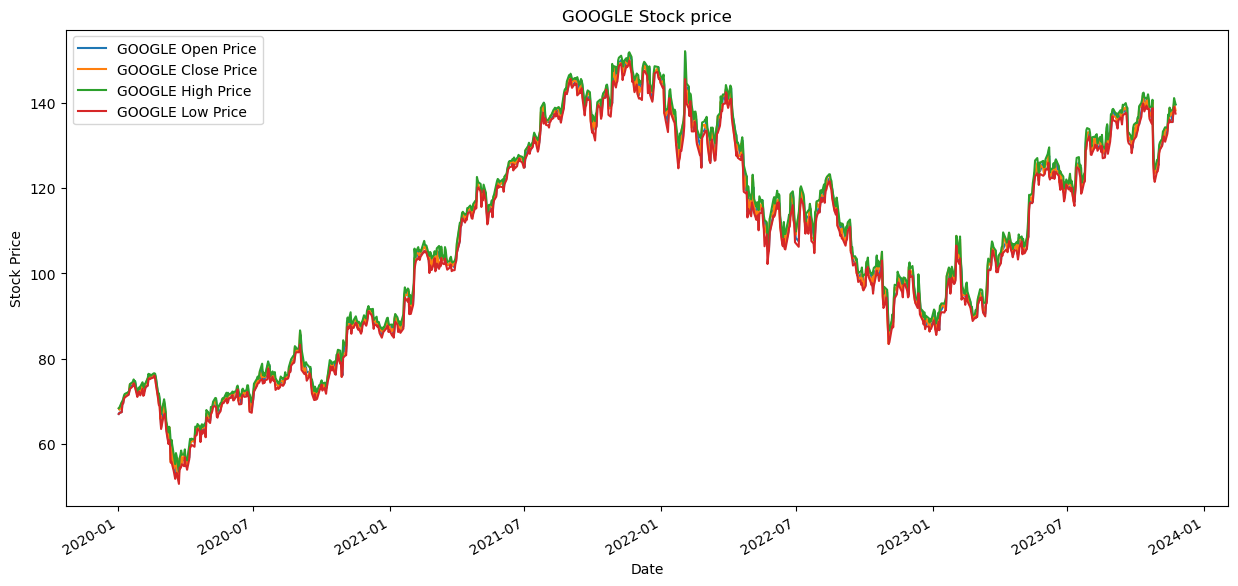

In [6]:
df["Open"].plot(label="GOOGLE Open Price" , figsize=(15,7))
df["Close"].plot(label="GOOGLE Close Price")
df["High"].plot(label="GOOGLE High Price")
df["Low"].plot(label="GOOGLE Low Price")
plt.legend()
plt.title("GOOGLE Stock price")
plt.ylabel("Stock Price")
plt.show()

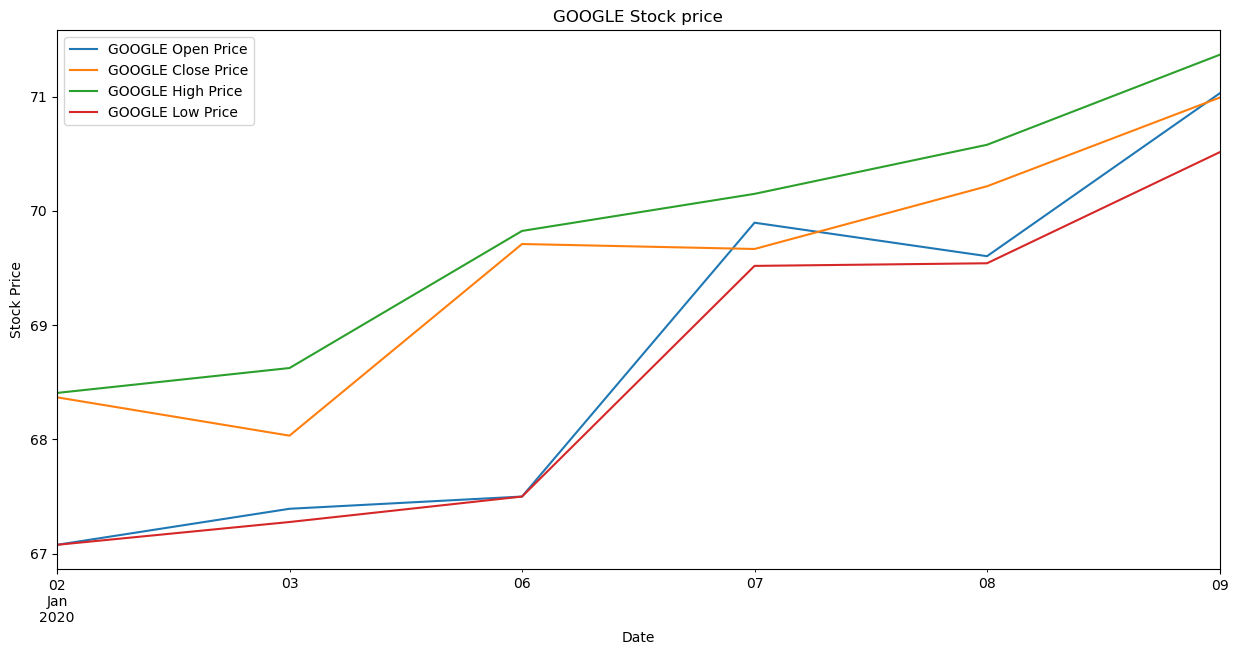

In [7]:
df6["Open"].plot(label="GOOGLE Open Price" , figsize=(15,7))
df6["Close"].plot(label="GOOGLE Close Price")
df6["High"].plot(label="GOOGLE High Price")
df6["Low"].plot(label="GOOGLE Low Price")
plt.legend()
plt.title("GOOGLE Stock price")
plt.ylabel("Stock Price")
plt.show()

## Volume Traded Visualization

Text(0.5, 1.0, 'Volume Traded By Google')

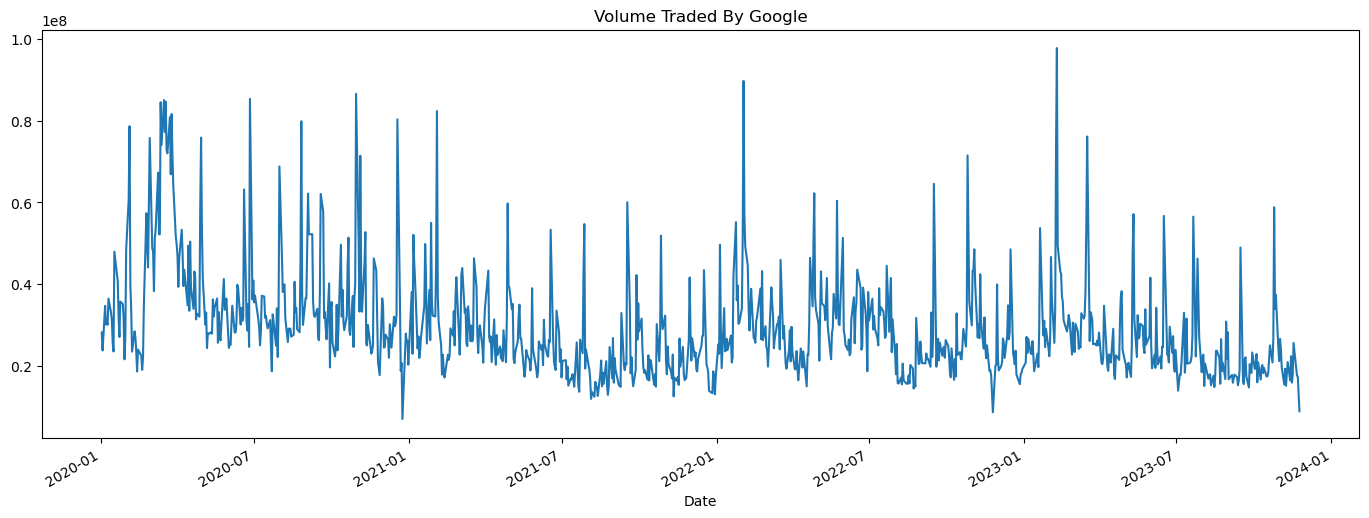

In [8]:
df['Volume'].plot(figsize=(17,6))
plt.title("Volume Traded By Google")

In [9]:
tesle=yf.Ticker("TSLA")
ford=yf.Ticker("F")
gm=yf.Ticker("GM")

In [10]:
df=tesle.history(start="2012-01-01",end="2023-11-25")

In [11]:
df1=ford.history(start="2012-01-01",end="2023-11-25")

In [12]:
df2=gm.history(start="2012-01-01",end="2023-11-25")

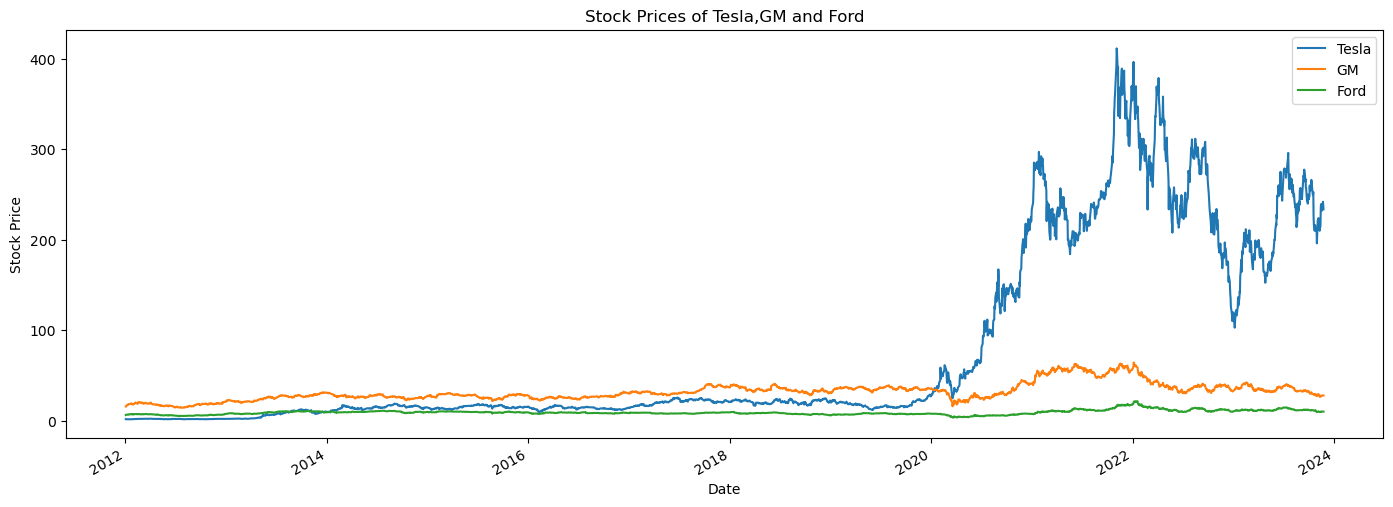

In [13]:
df["Open"].plot(label="Tesla",figsize=(17,6))
df2["Open"].plot(label="GM")
df1["Open"].plot(label="Ford")
plt.ylabel("Stock Price")
plt.title("Stock Prices of Tesla,GM and Ford")
plt.legend()


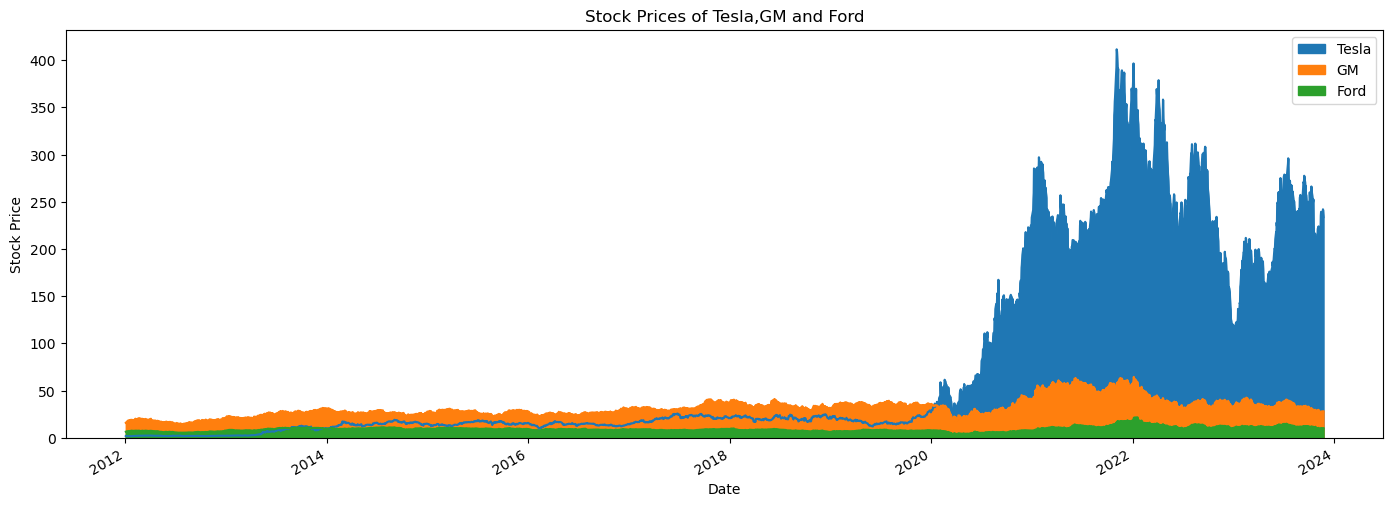

In [14]:
df["Open"].plot(label="Tesla",figsize=(17,6),kind="area")
df2["Open"].plot(label="GM",kind="area")
df1["Open"].plot(label="Ford",kind="area")
plt.ylabel("Stock Price")
plt.title("Stock Prices of Tesla,GM and Ford")
plt.legend()


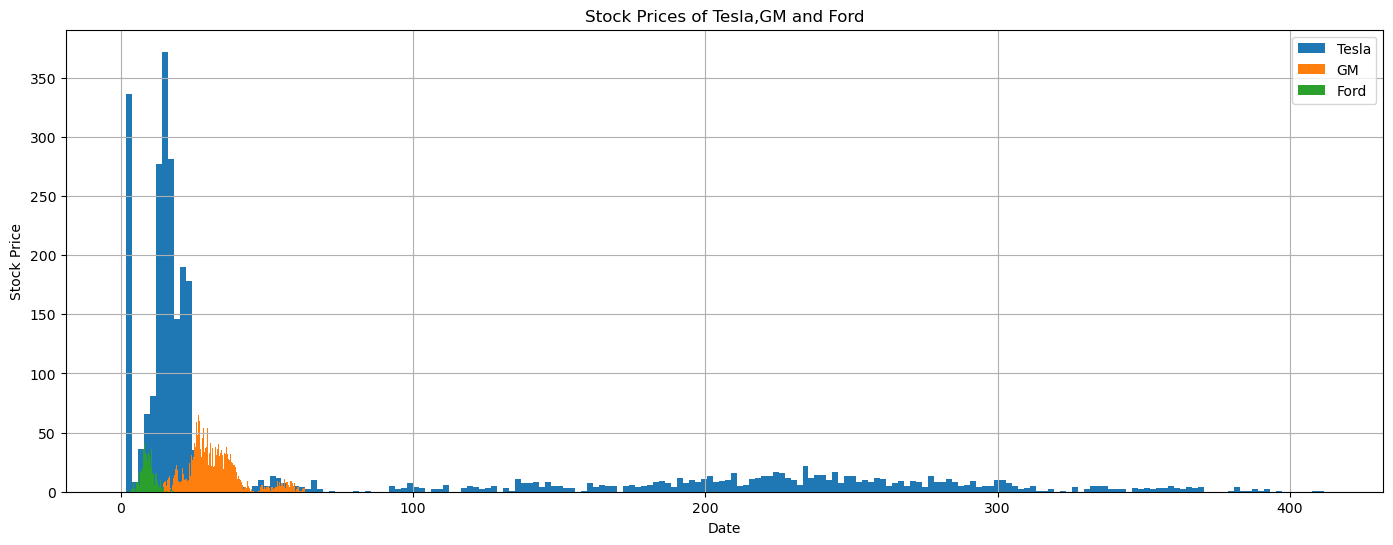

In [15]:
df["Open"].hist(label="Tesla",figsize=(17,6),bins=200)
df2["Open"].hist(label="GM",bins=200)
df1["Open"].hist(label="Ford",bins=300)
plt.ylabel("Stock Price")
plt.xlabel("Date")
plt.title("Stock Prices of Tesla,GM and Ford")
plt.legend()


## Volumne Traded & Interpretations

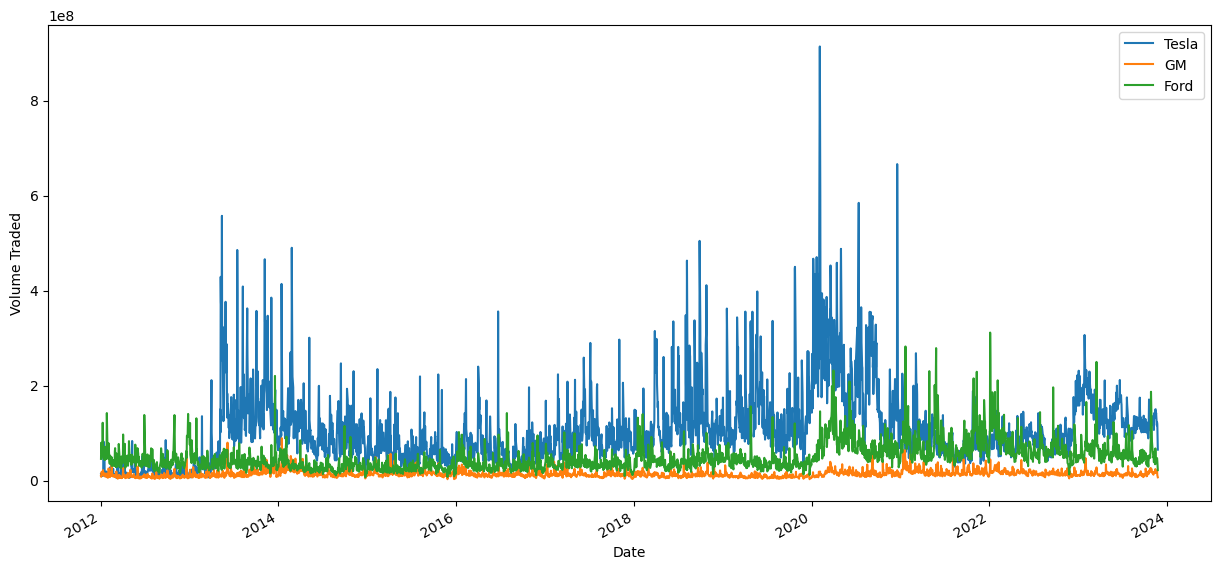

In [16]:
df['Volume'].plot(label="Tesla" ,figsize=(15,7))
df2['Volume'].plot(label="GM")
df1['Volume'].plot(label="Ford")
plt.ylabel("Volume Traded")
plt.legend()

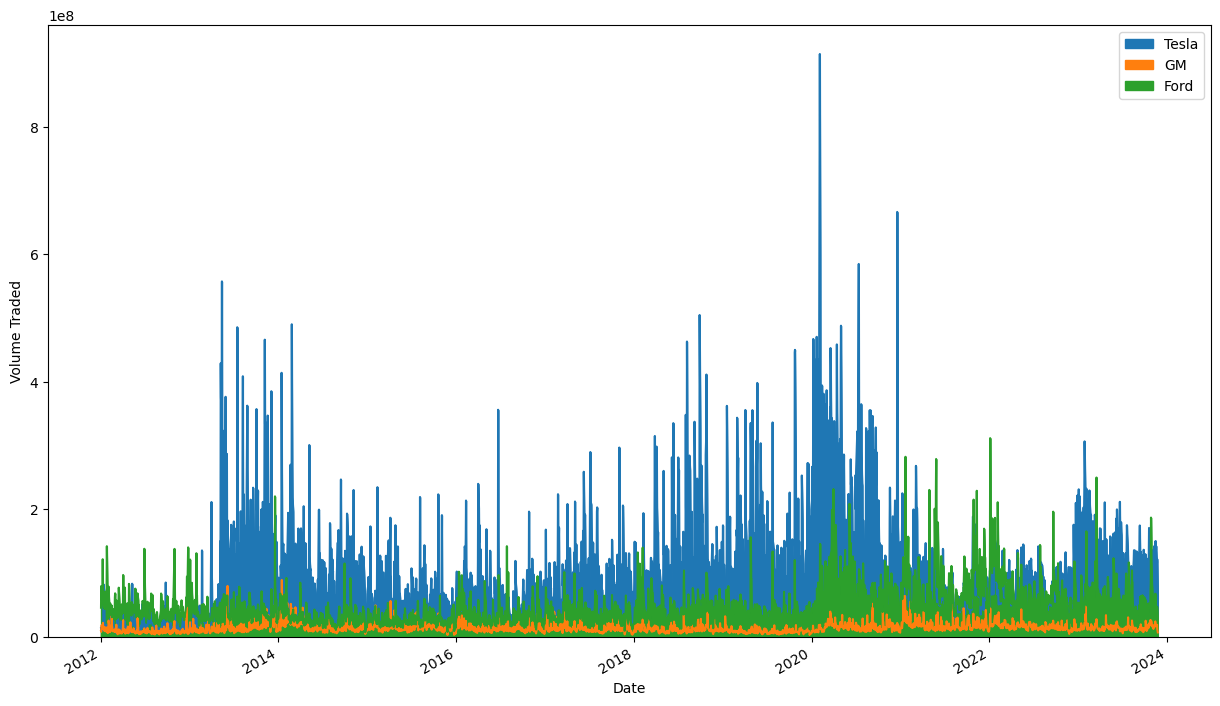

In [17]:

df['Volume'].plot(label="Tesla" ,figsize=(15,9),kind="area")
df2['Volume'].plot(label="GM",kind="area")
df1['Volume'].plot(label="Ford",kind="area")
plt.ylabel("Volume Traded")
plt.legend()


## MARKET CAP

In [18]:
df['Total Traded'] = df['Open'] * df['Volume']

In [19]:
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Total Traded
Date,,,,,,,,
2012-01-03 00:00:00-05:00,1.929333,1.966667,1.843333,1.872000,13921500,0.0,0.0,2.685921e+07
2012-01-04 00:00:00-05:00,1.880667,1.911333,1.833333,1.847333,9451500,0.0,0.0,1.777512e+07
2012-01-05 00:00:00-05:00,1.850667,1.862000,1.790000,1.808000,15082500,0.0,0.0,2.791269e+07
2012-01-06 00:00:00-05:00,1.813333,1.852667,1.760667,1.794000,14794500,0.0,0.0,2.682736e+07
2012-01-09 00:00:00-05:00,1.800000,1.832667,1.741333,1.816667,13455000,0.0,0.0,2.421900e+07
...,...,...,...,...,...,...,...,...
2023-11-17 00:00:00-05:00,232.000000,237.389999,226.539993,234.300003,142532800,0.0,0.0,3.306761e+10
2023-11-20 00:00:00-05:00,234.039993,237.100006,231.020004,235.600006,116320100,0.0,0.0,2.722356e+10
2023-11-21 00:00:00-05:00,235.039993,243.619995,233.339996,241.199997,122288000,0.0,0.0,2.874257e+10


In [20]:
df2['Total Traded'] = df2['Open'] * df2['Volume']

In [21]:
df2

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Total Traded
Date,,,,,,,,
2012-01-03 00:00:00-05:00,15.857133,16.123576,15.796232,16.024611,9321300,0.0,0.0,1.478091e+08
2012-01-04 00:00:00-05:00,16.024610,16.268216,15.796231,16.100737,7856700,0.0,0.0,1.259006e+08
2012-01-05 00:00:00-05:00,16.062672,16.968576,15.956094,16.877224,17880600,0.0,0.0,2.872102e+08
2012-01-06 00:00:00-05:00,16.945743,17.531917,16.930517,17.448177,18234500,0.0,0.0,3.089972e+08
2012-01-09 00:00:00-05:00,17.661333,17.836424,17.280701,17.387278,12084500,0.0,0.0,2.134284e+08
...,...,...,...,...,...,...,...,...
2023-11-17 00:00:00-05:00,27.780653,27.950169,27.451593,27.950169,19919800,0.0,0.0,5.533850e+08
2023-11-20 00:00:00-05:00,28.099740,28.688060,28.059853,28.438772,19348500,0.0,0.0,5.436878e+08
2023-11-21 00:00:00-05:00,28.169541,28.488629,27.621108,27.820538,19693500,0.0,0.0,5.547569e+08


In [22]:
df1['Total Traded'] = df1['Open'] * df1['Volume']

In [23]:
df1

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Total Traded
Date,,,,,,,,
2012-01-03 00:00:00-05:00,6.502269,6.650048,6.496358,6.579114,45709900,0.0,0.0,2.972181e+08
2012-01-04 00:00:00-05:00,6.590938,6.815562,6.543649,6.679605,79725200,0.0,0.0,5.254638e+08
2012-01-05 00:00:00-05:00,6.697340,6.874674,6.644139,6.851030,67877500,0.0,0.0,4.545987e+08
2012-01-06 00:00:00-05:00,6.939697,6.975164,6.809652,6.921964,59840700,0.0,0.0,4.152763e+08
2012-01-09 00:00:00-05:00,6.992895,7.063829,6.916050,6.975162,53981500,0.0,0.0,3.774870e+08
...,...,...,...,...,...,...,...,...
2023-11-17 00:00:00-05:00,10.260000,10.320000,10.190000,10.270000,36501200,0.0,0.0,3.745023e+08
2023-11-20 00:00:00-05:00,10.290000,10.430000,10.260000,10.340000,46933100,0.0,0.0,4.829416e+08
2023-11-21 00:00:00-05:00,10.280000,10.320000,10.100000,10.190000,47284300,0.0,0.0,4.860826e+08


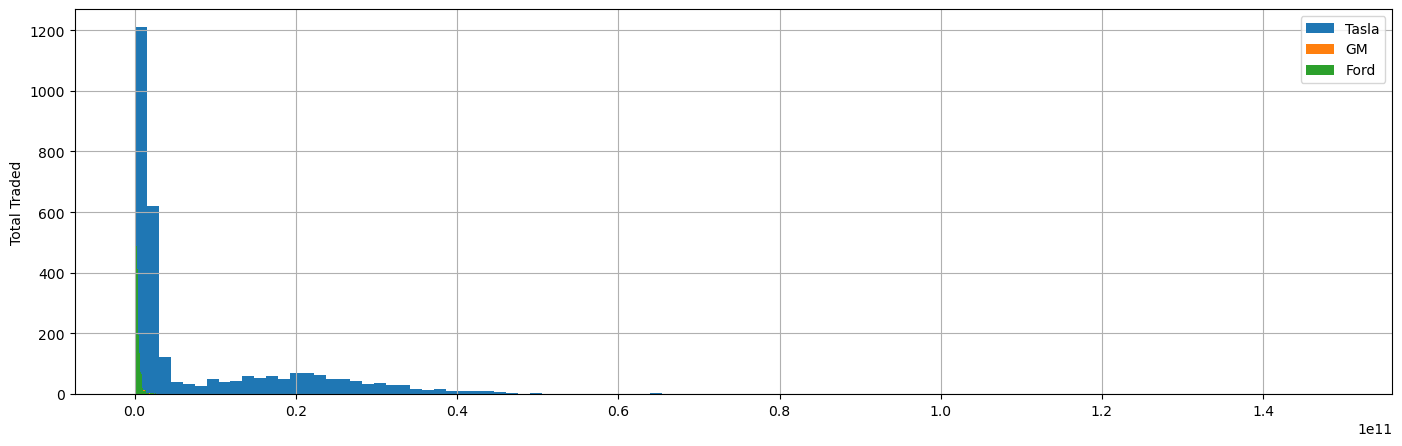

In [24]:
df['Total Traded'].hist(label="Tasla" , figsize=(17,5),bins=100)
df2['Total Traded'].hist(label="GM",bins=100)
df1['Total Traded'].hist(label="Ford",bins=100)
plt.ylabel("Total Traded")
plt.legend()

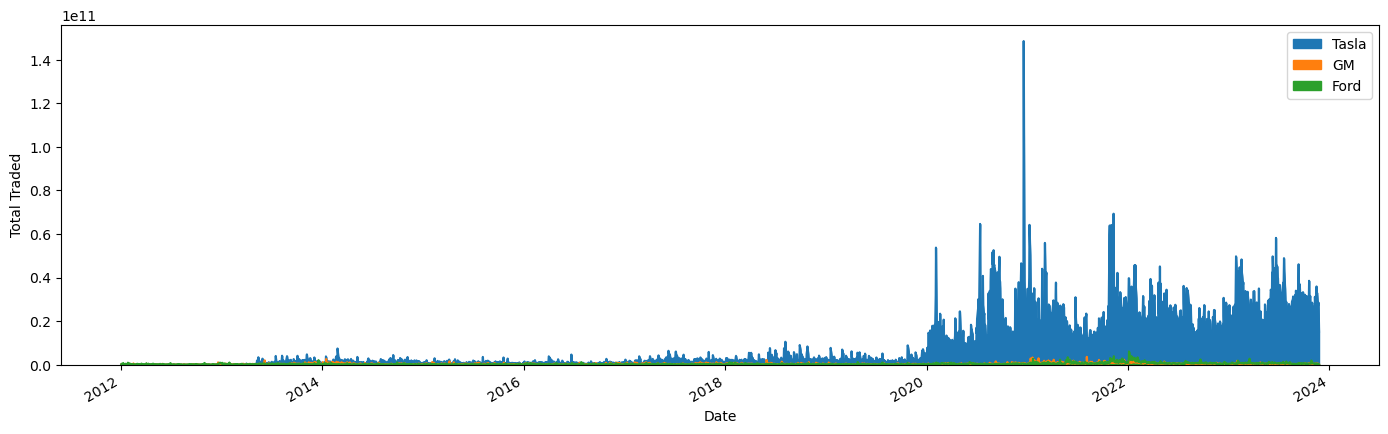

In [25]:
df['Total Traded'].plot(label="Tasla" , figsize=(17,5),kind="area")
df2['Total Traded'].plot(label="GM",kind="area")
df1['Total Traded'].plot(label="Ford",kind="area")
plt.ylabel("Total Traded")
plt.legend()

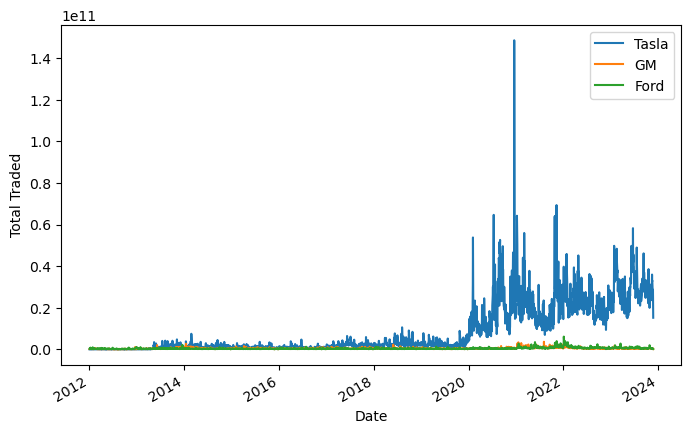

In [26]:
df['Total Traded'].plot(label="Tasla" , figsize=(8,5))
df2['Total Traded'].plot(label="GM")
df1['Total Traded'].plot(label="Ford")
plt.ylabel("Total Traded")
plt.legend()

In [27]:
df['Total Traded'].argmax()

2256

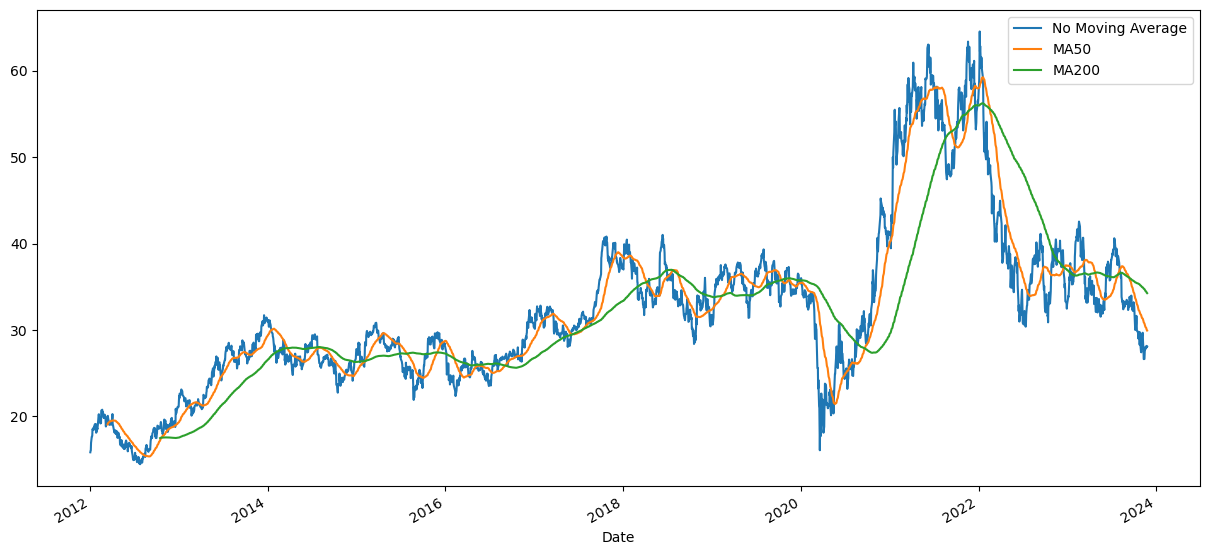

In [28]:
df2["Open"].plot(label="No Moving Average",figsize=(15,7))
df2["MA50"]=df2["Open"].rolling(50).mean()
#df2["MA50"].hist(label="MA50",bins=50)
df2["MA50"].plot()
df2["MA200"]=df2["Open"].rolling(200).mean()
df2["MA200"].plot()
plt.legend()
#df2["MA200"].hist(label="MA200",bins=50)
#plt.legend()

## CORRELATION & SCATTER MATRIX

In [29]:
from pandas.plotting import scatter_matrix
#import pandas as pd 

In [30]:
car_comp=pd.concat([df['Open'],df2['Open'],df1['Open']] , axis=1)
car_comp.columns=['Tesla Open','GM Open','Ford Open']

array([[<Axes: xlabel='Tesla Open', ylabel='Tesla Open'>,
        <Axes: xlabel='GM Open', ylabel='Tesla Open'>,
        <Axes: xlabel='Ford Open', ylabel='Tesla Open'>],
       [<Axes: xlabel='Tesla Open', ylabel='GM Open'>,
        <Axes: xlabel='GM Open', ylabel='GM Open'>,
        <Axes: xlabel='Ford Open', ylabel='GM Open'>],
       [<Axes: xlabel='Tesla Open', ylabel='Ford Open'>,
        <Axes: xlabel='GM Open', ylabel='Ford Open'>,
        <Axes: xlabel='Ford Open', ylabel='Ford Open'>]], dtype=object)

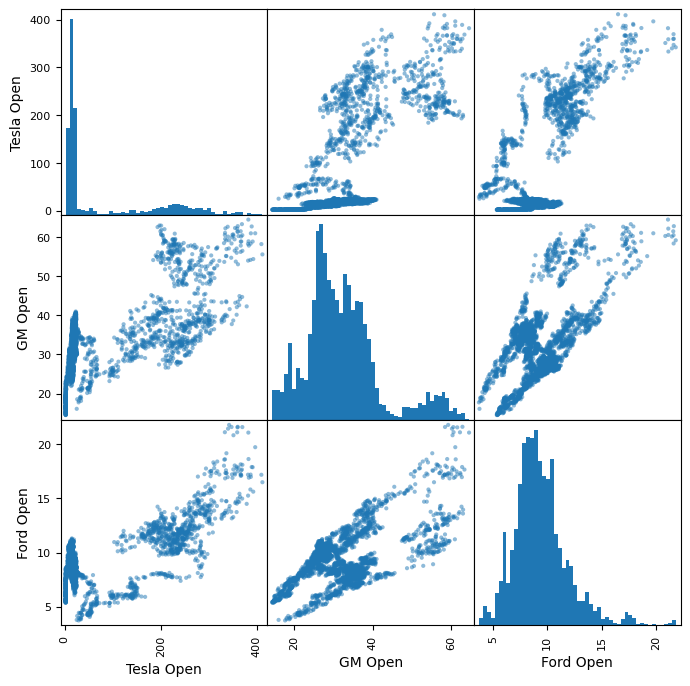

In [31]:
scatter_matrix(car_comp,figsize=(8,8),hist_kwds={'bins':50})

## CANDLESTICKS CHARTS

([<matplotlib.lines.Line2D at 0x25220a67990>,
  <matplotlib.patches.Rectangle at 0x25220ea0ed0>])

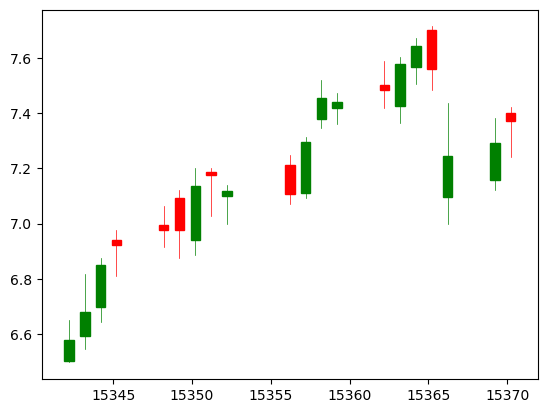

In [32]:
from mplfinance.original_flavor import candlestick_ohlc
from matplotlib.dates import DateFormatter,date2num,WeekdayLocator,DayLocator ,MONDAY
ford_reset=df1.loc['2012-01':'2012-01'].reset_index()
ford_reset['date_ax']=ford_reset['Date'].apply(lambda date:date2num(date))
ford_values=[tuple(vals) for vals in ford_reset[['date_ax','Open','High','Low','Close']].values]
mondays=WeekdayLocator(MONDAY)
alldays=DayLocator()
WeekdayLocator=DateFormatter('%b %d')
dayFormatter=DateFormatter('%d')
fig,ax=plt.subplots()
candlestick_ohlc(ax,ford_values,width=0.6,colorup='g',colordown='r')

## DAILY PERCENTAGE CHANGE

r1=(pt/pt-1)-1

In [33]:
df['returns']=(df['Close']/df['Close'].shift(1))-1

In [34]:
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Total Traded,returns
Date,,,,,,,,,
2012-01-03 00:00:00-05:00,1.929333,1.966667,1.843333,1.872000,13921500,0.0,0.0,2.685921e+07,NaN
2012-01-04 00:00:00-05:00,1.880667,1.911333,1.833333,1.847333,9451500,0.0,0.0,1.777512e+07,-0.013177
2012-01-05 00:00:00-05:00,1.850667,1.862000,1.790000,1.808000,15082500,0.0,0.0,2.791269e+07,-0.021292
2012-01-06 00:00:00-05:00,1.813333,1.852667,1.760667,1.794000,14794500,0.0,0.0,2.682736e+07,-0.007743
2012-01-09 00:00:00-05:00,1.800000,1.832667,1.741333,1.816667,13455000,0.0,0.0,2.421900e+07,0.012635
...,...,...,...,...,...,...,...,...,...
2023-11-17 00:00:00-05:00,232.000000,237.389999,226.539993,234.300003,142532800,0.0,0.0,3.306761e+10,0.003040
2023-11-20 00:00:00-05:00,234.039993,237.100006,231.020004,235.600006,116320100,0.0,0.0,2.722356e+10,0.005548
2023-11-21 00:00:00-05:00,235.039993,243.619995,233.339996,241.199997,122288000,0.0,0.0,2.874257e+10,0.023769


In [35]:
df2['returns']=(df2['Close']/df2['Close'].shift(1))-1

In [36]:
df2

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Total Traded,MA50,MA200,returns
Date,,,,,,,,,,,
2012-01-03 00:00:00-05:00,15.857133,16.123576,15.796232,16.024611,9321300,0.0,0.0,1.478091e+08,NaN,NaN,NaN
2012-01-04 00:00:00-05:00,16.024610,16.268216,15.796231,16.100737,7856700,0.0,0.0,1.259006e+08,NaN,NaN,0.004751
2012-01-05 00:00:00-05:00,16.062672,16.968576,15.956094,16.877224,17880600,0.0,0.0,2.872102e+08,NaN,NaN,0.048227
2012-01-06 00:00:00-05:00,16.945743,17.531917,16.930517,17.448177,18234500,0.0,0.0,3.089972e+08,NaN,NaN,0.033830
2012-01-09 00:00:00-05:00,17.661333,17.836424,17.280701,17.387278,12084500,0.0,0.0,2.134284e+08,NaN,NaN,-0.003490
...,...,...,...,...,...,...,...,...,...,...,...
2023-11-17 00:00:00-05:00,27.780653,27.950169,27.451593,27.950169,19919800,0.0,0.0,5.533850e+08,30.355498,34.516716,0.020015
2023-11-20 00:00:00-05:00,28.099740,28.688060,28.059853,28.438772,19348500,0.0,0.0,5.436878e+08,30.257777,34.456120,0.017481
2023-11-21 00:00:00-05:00,28.169541,28.488629,27.621108,27.820538,19693500,0.0,0.0,5.547569e+08,30.167834,34.394636,-0.021739


In [37]:
df1['returns']=(df1['Close']/df1['Close'].shift(1))-1

In [38]:
df1

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Total Traded,returns
Date,,,,,,,,,
2012-01-03 00:00:00-05:00,6.502269,6.650048,6.496358,6.579114,45709900,0.0,0.0,2.972181e+08,NaN
2012-01-04 00:00:00-05:00,6.590938,6.815562,6.543649,6.679605,79725200,0.0,0.0,5.254638e+08,0.015274
2012-01-05 00:00:00-05:00,6.697340,6.874674,6.644139,6.851030,67877500,0.0,0.0,4.545987e+08,0.025664
2012-01-06 00:00:00-05:00,6.939697,6.975164,6.809652,6.921964,59840700,0.0,0.0,4.152763e+08,0.010354
2012-01-09 00:00:00-05:00,6.992895,7.063829,6.916050,6.975162,53981500,0.0,0.0,3.774870e+08,0.007685
...,...,...,...,...,...,...,...,...,...
2023-11-17 00:00:00-05:00,10.260000,10.320000,10.190000,10.270000,36501200,0.0,0.0,3.745023e+08,0.010827
2023-11-20 00:00:00-05:00,10.290000,10.430000,10.260000,10.340000,46933100,0.0,0.0,4.829416e+08,0.006816
2023-11-21 00:00:00-05:00,10.280000,10.320000,10.100000,10.190000,47284300,0.0,0.0,4.860826e+08,-0.014507


<Axes: >

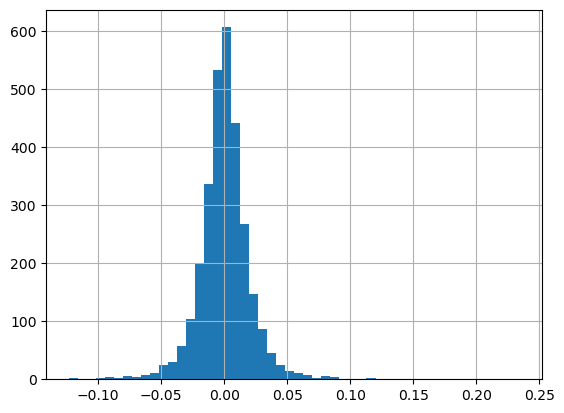

In [39]:
df1['returns'].hist(bins=50)

<Axes: >

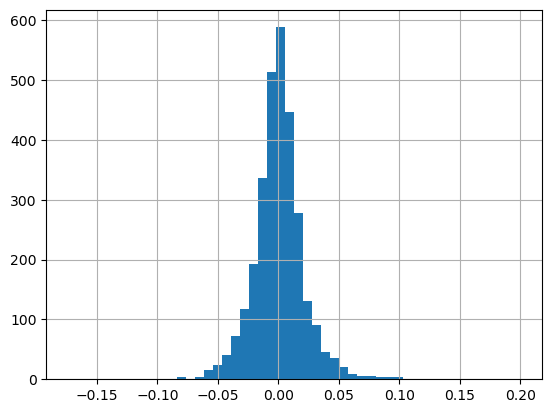

In [40]:
df2['returns'].hist(bins=50)

<Axes: >

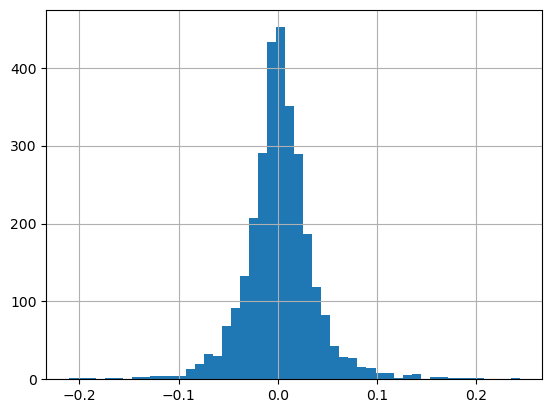

In [41]:
df['returns'].hist(bins=50)

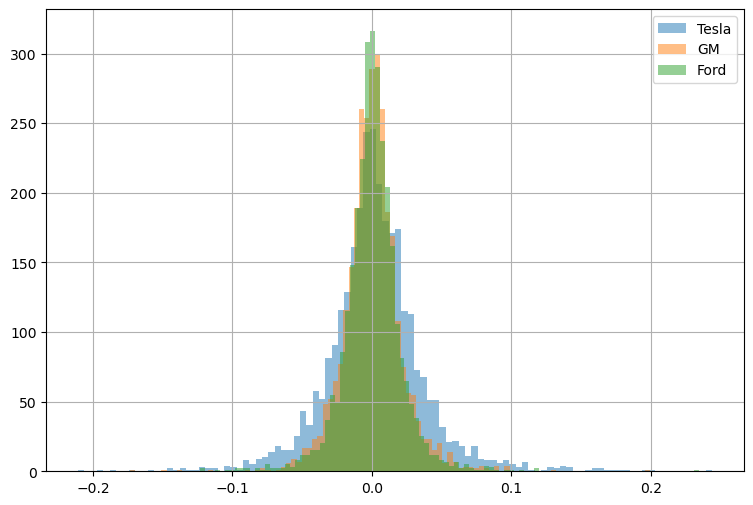

In [42]:
df['returns'].hist(bins=100 , label="Tesla",alpha=0.5,figsize=(9,6))
df2['returns'].hist(bins=100 , label="GM",alpha=0.5)
df1['returns'].hist(bins=100 , label="Ford",alpha=0.5)
plt.legend()

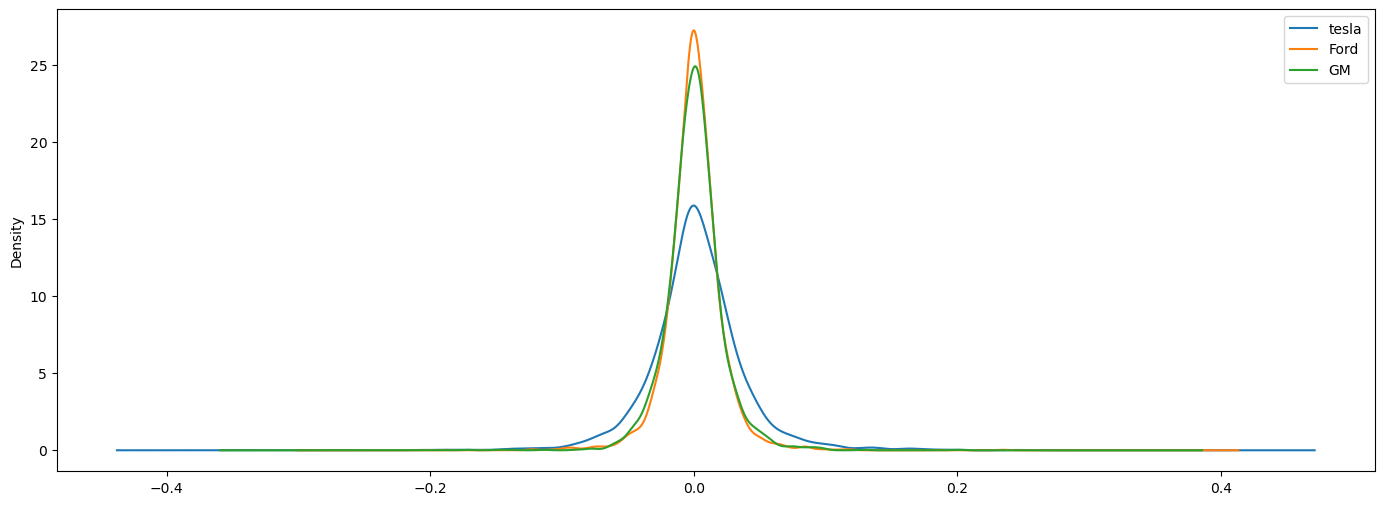

In [43]:
df['returns'].plot(kind='kde',label="tesla",figsize=(17,6))
df1['returns'].plot(kind='kde',label="Ford")
df2['returns'].plot(kind='kde',label="GM")
plt.legend()

## COMULATIVE RETURN

                        It=(1+rt)It-1=(1+pt/pt-1)it-1=(pt/pt-1)it-1

In [44]:
df['Cumulative_returns']=(1+df['returns']).cumprod()

In [45]:
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Total Traded,returns,Cumulative_returns
Date,,,,,,,,,,
2012-01-03 00:00:00-05:00,1.929333,1.966667,1.843333,1.872000,13921500,0.0,0.0,2.685921e+07,NaN,NaN
2012-01-04 00:00:00-05:00,1.880667,1.911333,1.833333,1.847333,9451500,0.0,0.0,1.777512e+07,-0.013177,0.986823
2012-01-05 00:00:00-05:00,1.850667,1.862000,1.790000,1.808000,15082500,0.0,0.0,2.791269e+07,-0.021292,0.965812
2012-01-06 00:00:00-05:00,1.813333,1.852667,1.760667,1.794000,14794500,0.0,0.0,2.682736e+07,-0.007743,0.958333
2012-01-09 00:00:00-05:00,1.800000,1.832667,1.741333,1.816667,13455000,0.0,0.0,2.421900e+07,0.012635,0.970442
...,...,...,...,...,...,...,...,...,...,...
2023-11-17 00:00:00-05:00,232.000000,237.389999,226.539993,234.300003,142532800,0.0,0.0,3.306761e+10,0.003040,125.160259
2023-11-20 00:00:00-05:00,234.039993,237.100006,231.020004,235.600006,116320100,0.0,0.0,2.722356e+10,0.005548,125.854706
2023-11-21 00:00:00-05:00,235.039993,243.619995,233.339996,241.199997,122288000,0.0,0.0,2.874257e+10,0.023769,128.846154


In [46]:
df2['Cumulative_returns']=(1+df2['returns']).cumprod()

In [47]:
df2

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Total Traded,MA50,MA200,returns,Cumulative_returns
Date,,,,,,,,,,,,
2012-01-03 00:00:00-05:00,15.857133,16.123576,15.796232,16.024611,9321300,0.0,0.0,1.478091e+08,NaN,NaN,NaN,NaN
2012-01-04 00:00:00-05:00,16.024610,16.268216,15.796231,16.100737,7856700,0.0,0.0,1.259006e+08,NaN,NaN,0.004751,1.004751
2012-01-05 00:00:00-05:00,16.062672,16.968576,15.956094,16.877224,17880600,0.0,0.0,2.872102e+08,NaN,NaN,0.048227,1.053207
2012-01-06 00:00:00-05:00,16.945743,17.531917,16.930517,17.448177,18234500,0.0,0.0,3.089972e+08,NaN,NaN,0.033830,1.088836
2012-01-09 00:00:00-05:00,17.661333,17.836424,17.280701,17.387278,12084500,0.0,0.0,2.134284e+08,NaN,NaN,-0.003490,1.085036
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-11-17 00:00:00-05:00,27.780653,27.950169,27.451593,27.950169,19919800,0.0,0.0,5.533850e+08,30.355498,34.516716,0.020015,1.744203
2023-11-20 00:00:00-05:00,28.099740,28.688060,28.059853,28.438772,19348500,0.0,0.0,5.436878e+08,30.257777,34.456120,0.017481,1.774694
2023-11-21 00:00:00-05:00,28.169541,28.488629,27.621108,27.820538,19693500,0.0,0.0,5.547569e+08,30.167834,34.394636,-0.021739,1.736113


In [48]:
df1['Cumulative_returns']=(1+df1['returns']).cumprod()

In [49]:
df1

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Total Traded,returns,Cumulative_returns
Date,,,,,,,,,,
2012-01-03 00:00:00-05:00,6.502269,6.650048,6.496358,6.579114,45709900,0.0,0.0,2.972181e+08,NaN,NaN
2012-01-04 00:00:00-05:00,6.590938,6.815562,6.543649,6.679605,79725200,0.0,0.0,5.254638e+08,0.015274,1.015274
2012-01-05 00:00:00-05:00,6.697340,6.874674,6.644139,6.851030,67877500,0.0,0.0,4.545987e+08,0.025664,1.041330
2012-01-06 00:00:00-05:00,6.939697,6.975164,6.809652,6.921964,59840700,0.0,0.0,4.152763e+08,0.010354,1.052112
2012-01-09 00:00:00-05:00,6.992895,7.063829,6.916050,6.975162,53981500,0.0,0.0,3.774870e+08,0.007685,1.060198
...,...,...,...,...,...,...,...,...,...,...
2023-11-17 00:00:00-05:00,10.260000,10.320000,10.190000,10.270000,36501200,0.0,0.0,3.745023e+08,0.010827,1.561000
2023-11-20 00:00:00-05:00,10.290000,10.430000,10.260000,10.340000,46933100,0.0,0.0,4.829416e+08,0.006816,1.571640
2023-11-21 00:00:00-05:00,10.280000,10.320000,10.100000,10.190000,47284300,0.0,0.0,4.860826e+08,-0.014507,1.548841


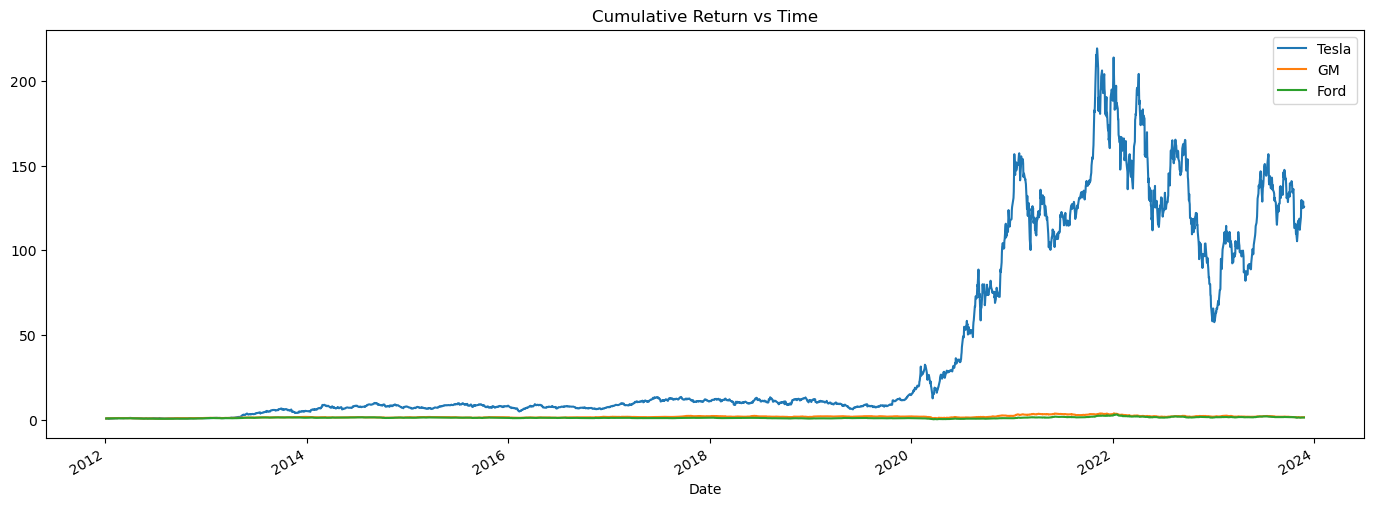

In [50]:
df['Cumulative_returns'].plot(label="Tesla",figsize=(17,6))
df2['Cumulative_returns'].plot(label="GM")
df1['Cumulative_returns'].plot(label="Ford")
plt.title("Cumulative Return vs Time")
plt.legend()

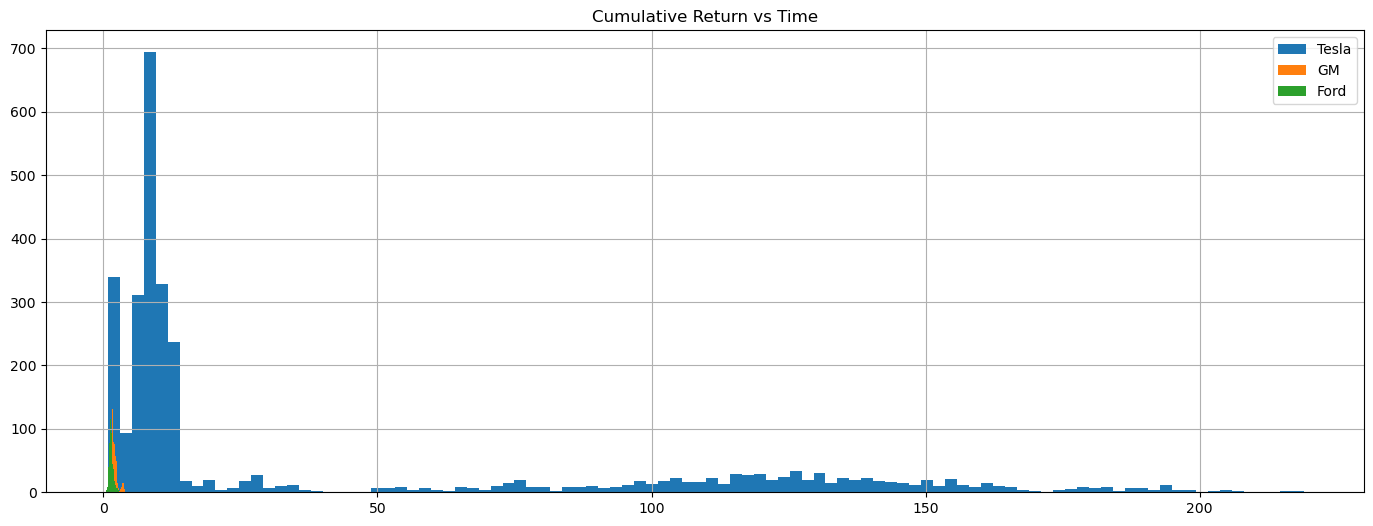

In [51]:
df['Cumulative_returns'].hist(label="Tesla",figsize=(17,6),bins=100)
df2['Cumulative_returns'].hist(label="GM",bins=100)
df1['Cumulative_returns'].hist(label="Ford",bins=100)
plt.title("Cumulative Return vs Time")
plt.legend()